1. Загрузка библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Загрузка всех листов из Excel файла

In [5]:
file_path = 'marketplace_data.xlsx'

transactions = pd.read_excel(file_path, sheet_name='transactions')
products = pd.read_excel(file_path, sheet_name='products')
sellers = pd.read_excel(file_path, sheet_name='sellers')
cities = pd.read_excel(file_path, sheet_name='cities')
users = pd.read_excel(file_path, sheet_name='users')

3. Фильтруем только завершённые транзакции

In [8]:
completed_transactions = transactions[transactions['status'] == 'completed']

4. Объединение таблиц

In [11]:
# Соединяем транзакции с продуктами, чтобы получить цену
df = completed_transactions.merge(products, left_on='product_id', right_on='id', suffixes=('', '_product'))

# Соединяем с пользователями, чтобы узнать город пользователя
df = df.merge(users, left_on='user_id', right_on='id', suffixes=('', '_user'))

# Соединяем с таблицей городов, чтобы получить название города
df = df.merge(cities, left_on='city_id', right_on='id', suffixes=('', '_city'))

5. Группируем по названию города и считаем сумму цен

In [14]:
revenue_by_city = df.groupby('name_city')['price'].sum().reset_index()
revenue_by_city = revenue_by_city.rename(columns={'price': 'revenue'})

# Сортируем по убыванию выручки
revenue_by_city = revenue_by_city.sort_values(by='revenue', ascending=False)

6. Построение гистограммы

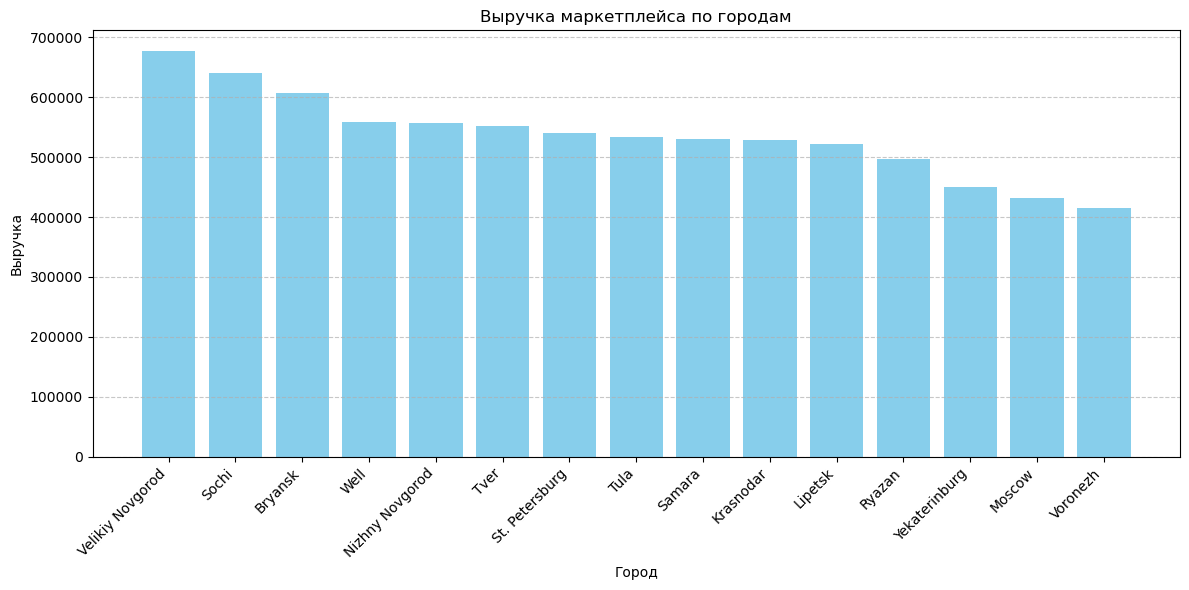

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_city['name_city'], revenue_by_city['revenue'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Город')
plt.ylabel('Выручка')
plt.title('Выручка маркетплейса по городам')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()